# Time Series to Predict 
Journal: https://ejournal.stkipbudidaya.ac.id/index.php/jf/user

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Import Dataset
df = pd.read_csv('Data Historis USD_IDR.csv')
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,1/1/2012,"8.980,0","9.100,0","9.210,5","8.875,0",NaN,"-0,88%"
1,1/2/2012,"9.010,0","9.005,0","9.180,0","8.870,0",NaN,"0,33%"
2,1/3/2012,"9.139,0","9.050,0","9.211,0","9.065,0",NaN,"1,43%"
3,1/4/2012,"9.188,0","9.170,0","9.199,0","9.085,0",NaN,"0,54%"
4,1/5/2012,"9.390,0","9.192,5","9.612,5","9.147,5",NaN,"2,20%"


In [4]:
# Deskripsi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     136 non-null    object 
 1   Terakhir    136 non-null    object 
 2   Pembukaan   136 non-null    object 
 3   Tertinggi   136 non-null    object 
 4   Terendah    136 non-null    object 
 5   Vol.        0 non-null      float64
 6   Perubahan%  136 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.6+ KB


In [5]:
# Konversi data menjadi numerik
df["Terakhir"] = df["Terakhir"].str.replace(".", "")
df["Terakhir"] = df["Terakhir"].str.replace(",", ".")
df["Terakhir"] = df["Terakhir"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     136 non-null    object 
 1   Terakhir    136 non-null    float64
 2   Pembukaan   136 non-null    object 
 3   Tertinggi   136 non-null    object 
 4   Terendah    136 non-null    object 
 5   Vol.        0 non-null      float64
 6   Perubahan%  136 non-null    object 
dtypes: float64(2), object(5)
memory usage: 7.6+ KB


C:\Users\Steven\AppData\Local\Temp\ipykernel_20580\3862336161.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Terakhir"] = df["Terakhir"].str.replace(".", "")


In [7]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,1/1/2012,8980.0,"9.100,0","9.210,5","8.875,0",NaN,"-0,88%"
1,1/2/2012,9010.0,"9.005,0","9.180,0","8.870,0",NaN,"0,33%"
2,1/3/2012,9139.0,"9.050,0","9.211,0","9.065,0",NaN,"1,43%"
3,1/4/2012,9188.0,"9.170,0","9.199,0","9.085,0",NaN,"0,54%"
4,1/5/2012,9390.0,"9.192,5","9.612,5","9.147,5",NaN,"2,20%"


In [6]:
# Ambil variabel "Terakhir" sebagai harga penutup dalam bulan tersebut
df = df["Terakhir"]
df.head()

0    8980.0
1    9010.0
2    9139.0
3    9188.0
4    9390.0
Name: Terakhir, dtype: float64

In [33]:
# Eksplorasi Data
df.describe()

count      136.000000
mean     13154.705882
std       1758.247748
min       8980.000000
25%      12203.500000
50%      13665.000000
75%      14328.750000
max      16300.000000
Name: Terakhir, dtype: float64

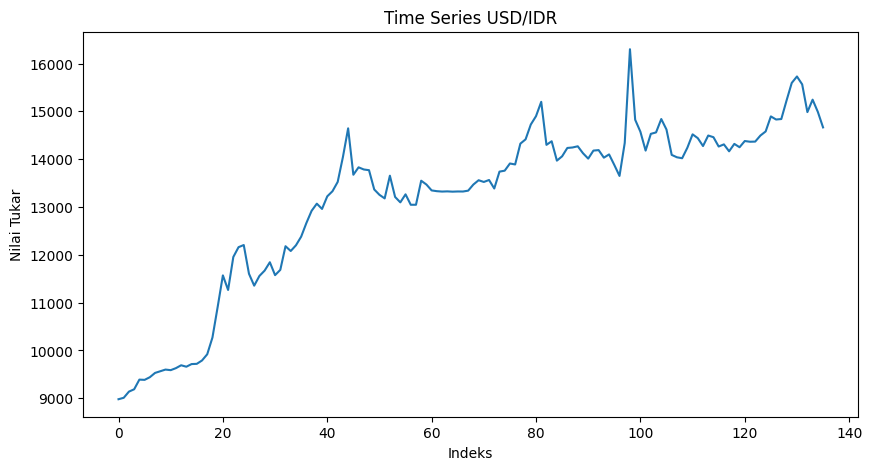

In [7]:
# Create time series plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(list(range(len(df))), df)
plt.title("Time Series USD/IDR")
plt.xlabel("Indeks")
plt.ylabel("Nilai Tukar")
plt.show()

In [8]:
# Split Train and Test Data
train_df = df[:int(len(df)*0.8)]
test_df = df[int(len(df)*0.8):]

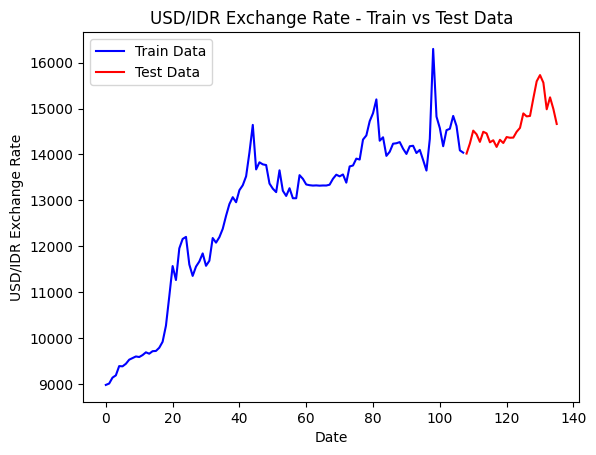

In [19]:
# Time series plot for train and test data
fig, ax = plt.subplots()

# Plotting train data with blue color
ax.plot(train_df.index, train_df.values, color='blue', label='Train Data')

# Plotting test data with red color
ax.plot(test_df.index, test_df.values, color='red', label='Test Data')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('USD/IDR Exchange Rate')
ax.set_title('USD/IDR Exchange Rate - Train vs Test Data')
ax.legend()

# Display the plot
plt.show()

In [9]:
# Package for ACF PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

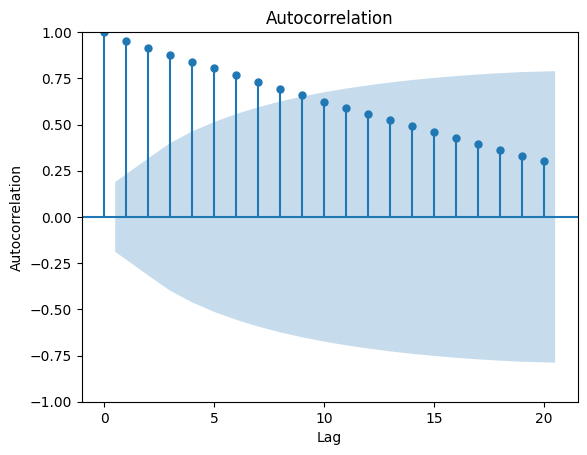

In [10]:
# ACF plot to determine the Moving Average Order (MA)
plot_acf(train_df, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

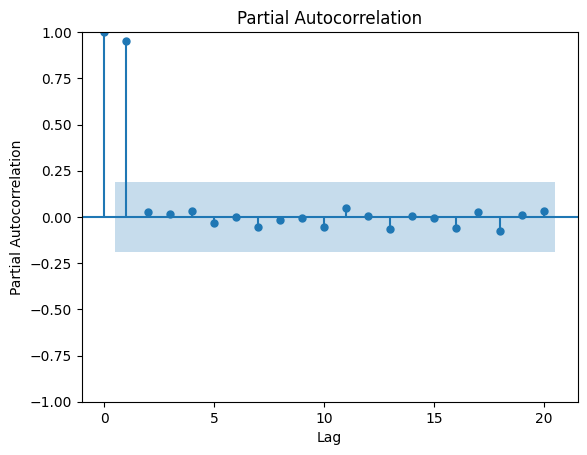

In [11]:
# PACF plot to determine to order of the Autoregressive Order (AR)
plot_pacf(train_df, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

Based on the ACF and PACF plot, we found that the ACF show that the data is not in stationary state, in order to fix this, we need to add difference to the data, we will start with diff 1.

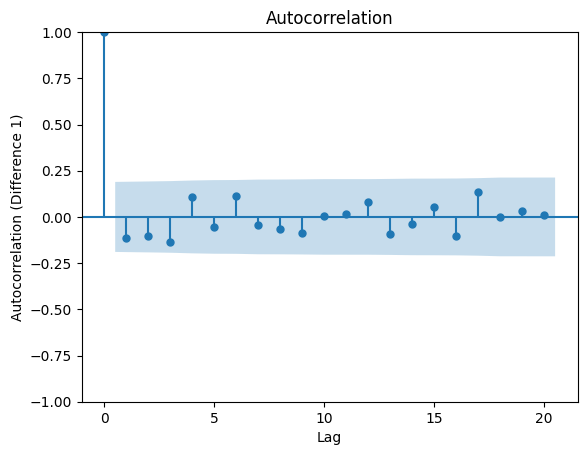

In [12]:
# ACF plot to determine the Moving Average Order (MA)
plot_acf(train_df.diff().dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation (Difference 1)')
plt.show()

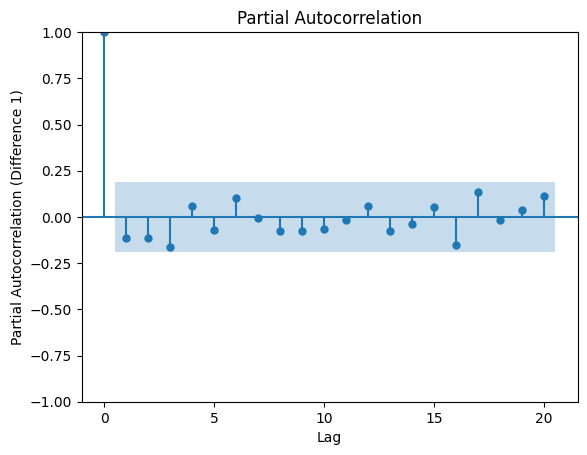

In [13]:
# PACF plot to determine the Moving Average Order (MA)
plot_pacf(train_df.diff().dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation (Difference 1)')
plt.show()

After we difference the data and examine the ACF and PACF, we found out that there is no significant lag on ACF nor PACF. We will now try to diff 2 to check if there any significant lags. This ACF plot also show that the data isn't stationary yet, so we will difference it again.

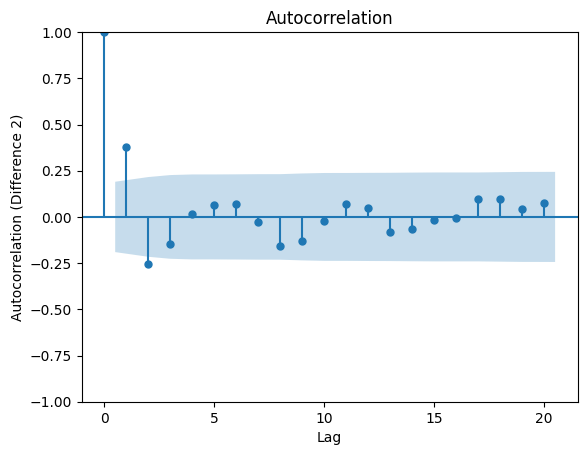

In [14]:
# ACF plot to determine the Moving Average Order (MA)
plot_acf(train_df.diff(2).dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation (Difference 2)')
plt.show()

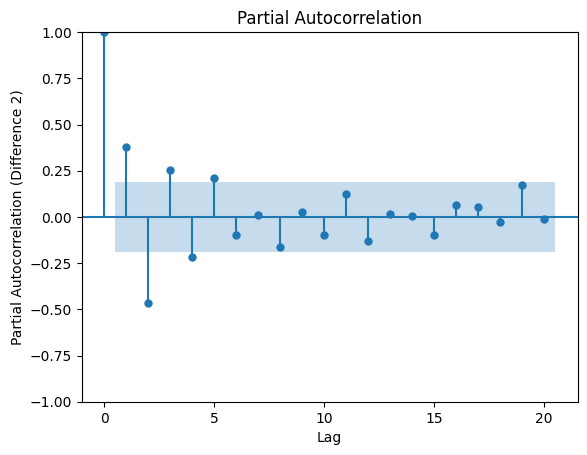

In [15]:
# PACF plot to determine the Moving Average Order (MA)
plot_pacf(train_df.diff(2).dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation (Difference 2)')
plt.show()

After examining the ACF and PACF on the data with difference lag 2, we have found out that there are some possible ARIMA model, those are:
1. ARIMA(0, 2, 1)
2. ARIMA(0, 2, 2)
We will try to create those model and compare the model to find out which one perform better.

In [22]:
# Define the model
model_021 = ARIMA(train_df, order=(0, 2, 1))
model_022 = ARIMA(train_df, order=(0, 2, 2))

model_021_fit = model_021.fit()
model_022_fit = model_022.fit()

# Print the model summary
print(model_021_fit.summary())
print(model_022_fit.summary())

C:\Users\Steven\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Terakhir   No. Observations:                  108
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -781.793
Date:                Fri, 12 May 2023   AIC                           1567.587
Time:                        13:20:17   BIC                           1572.914
Sample:                             0   HQIC                          1569.746
                                - 108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9984      0.342     -2.920      0.004      -1.669      -0.328
sigma2      1.299e+05   4.65e+04      2.793      0.005    3.87e+04    2.21e+05
Ljung-Box (L1) (Q):                   1.16   Jarque-

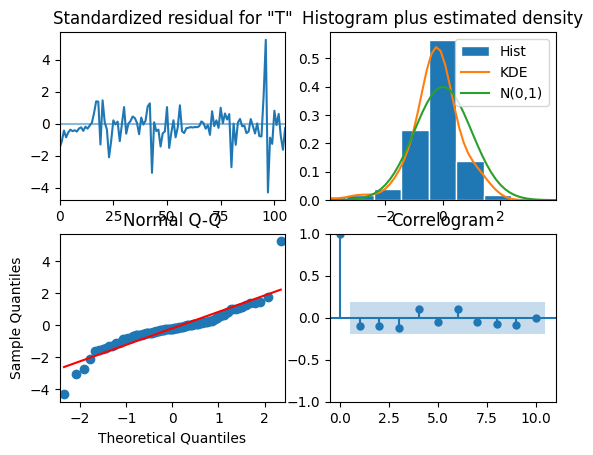

In [17]:
# Perform model diagnostics for model 021
model_021_fit.plot_diagnostics()
plt.show()

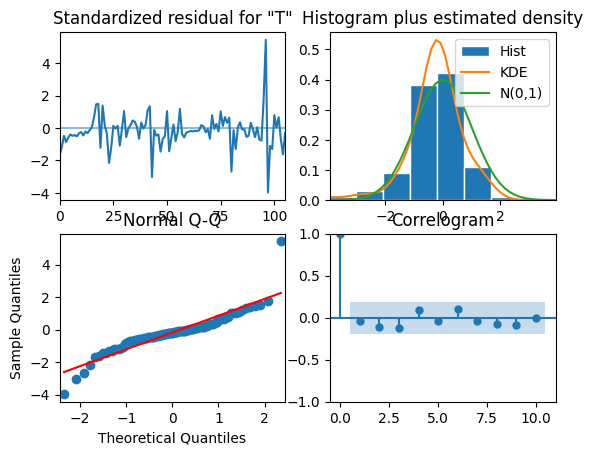

In [18]:
# Perform model diagnostics for model 021
model_022_fit.plot_diagnostics()
plt.show()

Based on these diagnostic and the model summary, ARIMA(0, 2, 1) perform better because it has smaller AIC criterion, significant orders, no significant autocorrelation in the residuals at least lag 1. Overall, based on these results, the ARIMAX(0, 2, 1) model seems to provide a reasonable fit to the data. We will continue to forecast the data to test it against test data.

In [25]:
# Forecast future values
forecast = model_021_fit.forecast(steps=len(test_df))

# Evaluate the model
mse = ((forecast - test_df) ** 2).mean()
rmse = np.sqrt(mse)

# MAPE metric
abs_percentage_error = np.abs((forecast - test_df) / test_df)
mape = np.mean(abs_percentage_error) * 100

print('Root Mean Squared Error (RMSE):', rmse)
print("MAPE: {:.2f}%".format(mape))

Root Mean Squared Error (RMSE): 371.22963405319285
MAPE: 2.13%


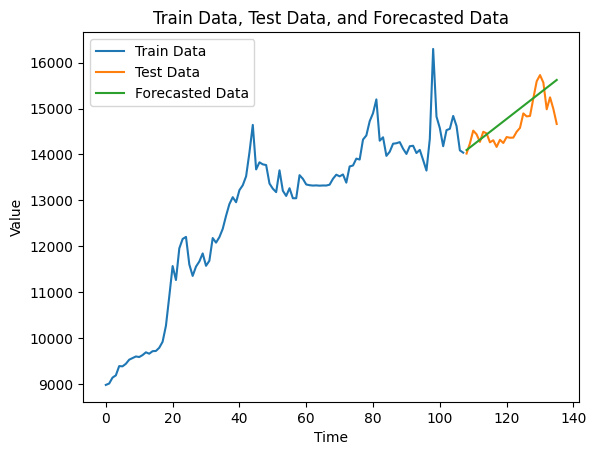

In [26]:
# Create a range of indices for the time axis
time_index = range(len(train_df) + len(test_df))

# Plot train data
plt.plot(time_index[:len(train_df)], train_df, label='Train Data')

# Plot test data
plt.plot(time_index[len(train_df):], test_df, label='Test Data')

# Plot forecasted data
plt.plot(time_index[len(train_df):], forecast, label='Forecasted Data')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Train Data, Test Data, and Forecasted Data')

# Display legend
plt.legend()

# Show the plot
plt.show()